In [30]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics  import root_mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [3]:
ag =pd.read_csv('AusGas.csv',index_col=0)
y = ag['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

In [26]:
new_df = ag.tail(325)

In [27]:
y = new_df['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((313,), (12,))

<Axes: xlabel='Month'>

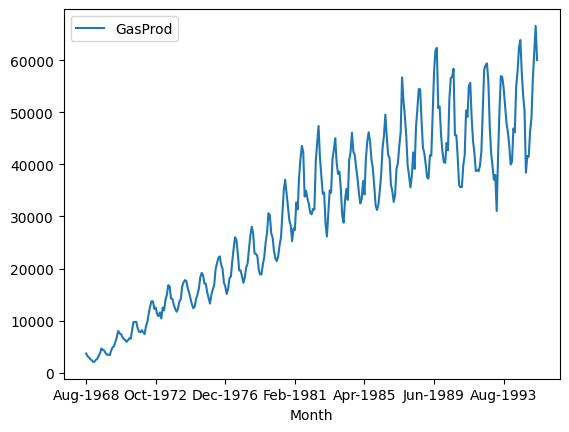

In [28]:
new_df.plot()

# Auto ARIMA

In [31]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5765.294, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5940.286, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5912.820, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5921.831, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5939.369, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5905.541, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5749.347, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5801.331, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5754.386, Time=1.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5839.793, Time=1.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5784.067, Time=1.02 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=5724.8

In [32]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

2621.7099062983525

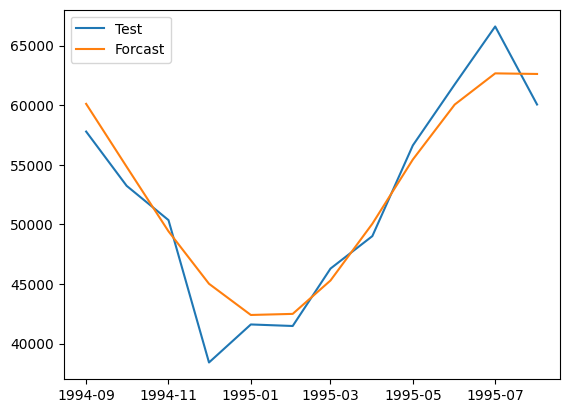

In [33]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Auto SARIMA

In [37]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5736.802, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5940.286, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5693.847, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5812.845, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5939.369, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5912.820, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=5645.205, Time=1.50 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=5828.894, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=5672.302, Time=3.32 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=5681.767, Time=2.89 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=5769.576, Time=1.38 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5670.391, Time=1.62 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

In [38]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

3554.6202915857184

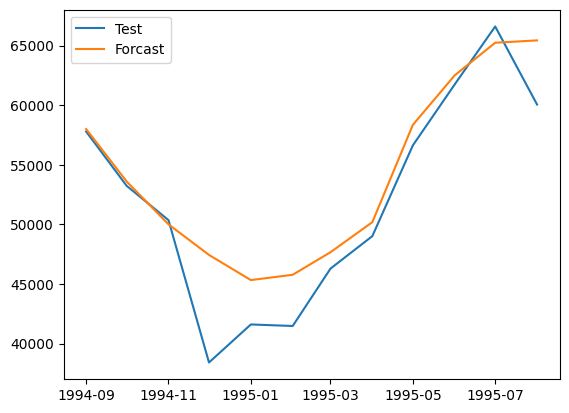

In [39]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

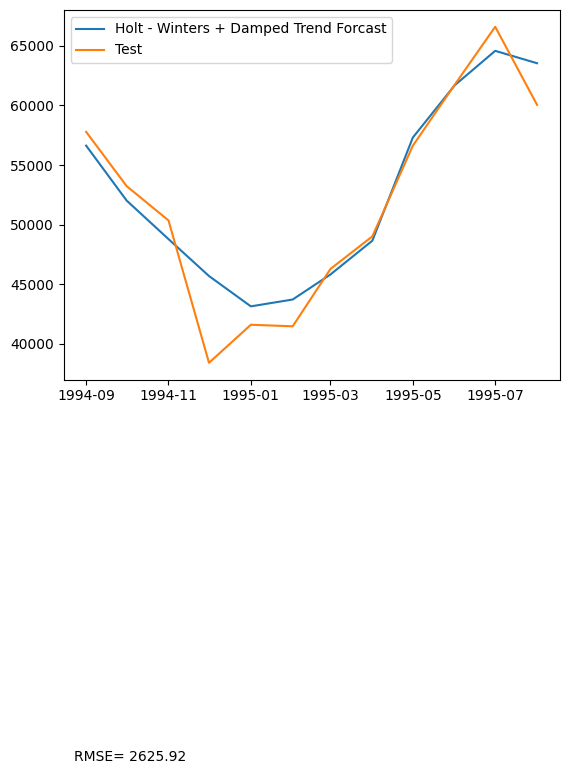

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add', damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(9000, 5000, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()